# Project Title : Seoul Bike Sharing Demand Prediction

## <b> Problem Description </b>

### In this assignment,  develop a predictive model for the number of rented bikes in Seoul using the Seoul Bike Sharing Demand dataset. Important point is model need to be multi linear regression model and if it's possible achieve a higher R2 by using appropriate transformations on the predictors, or fine-tuning your model.

## EDA

Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

### Loading the dataset

In [2]:
data= pd.read_csv("data/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [3]:
# Copy the data for backup
df = data.copy()

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(¬∞C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(¬∞C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Data shape
df.shape

(8760, 14)

In [6]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(¬∞C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(¬∞C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   obj

In [7]:
# Statistical info 
df.describe(include='all').transpose()

count unique         top  freq         mean  \
Date                         8760    365  30/11/2018    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(¬∞C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(¬∞C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(¬∞C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(¬∞C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [8]:
df.isnull().sum().transpose()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(¬∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(¬∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Data Description
there is no missing value
- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour: target
- Hour - Hour of the day when bike is rented
- Temperature-Temperature of date, celcious
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature(Ïù¥Ïä¨Ï†ê) Celsius
- Solar radiation - MJ/m2, ÌÉúÏñë Î≥µÏÇ¨ÏóêÎÑàÏßÄ
- Rainfall - mm
- Snowfall - cm Ï†ÅÏÑ§Îüâ 
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours): Ï†ïÏÉÅ Ïö¥ÌñâÏó¨Î∂Ä

### Preprocessing the data

In [9]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(¬∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(¬∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Checking duplicate
df.duplicated().sum()
df[df.duplicated()]

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(¬∞C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(¬∞C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

In [11]:
# converting date column dtype object to date 
df['Date']= pd.to_datetime(df['Date'], dayfirst=True)

In [12]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [13]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

In [14]:
df.head()

Rented Bike Count  Hour  Temperature(¬∞C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(¬∞C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week     month  year  
0      Friday  December  2017  
1      Friday  December  2017  
2      Friday  December  2017  
3      Friday  December  2017  
4      Friday  December  2017

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(¬∞C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(¬∞C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   obj

In [16]:
# convert Hour column integer to Categorical 
# HourÎäî ÎπåÎ¶∞ ÏãúÍ∞ÑÏùÑ ÏùòÎØ∏ÌïòÏßÄÎßå categoricalÎ°ú Ìï¥ÏÑùÌïòÎäîÍ≤å ÎßûÏùå, Ïñ¥Îäê ÏãúÍ∞ÑÎåÄÏù∏ÏßÄÍ∞Ä Ï§ëÏöîÌïòÏßÄ Ïà´ÏûêÏÉÅ ÏùòÎØ∏Îäî X
df['Hour']=df['Hour'].astype('object')

In [17]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [18]:
numeric_features.head()

Rented Bike Count  Temperature(¬∞C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(¬∞C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

In [19]:
categorical_features.head()

Hour Seasons     Holiday Functioning Day day_of_week     month  year
0    0  Winter  No Holiday             Yes      Friday  December  2017
1    1  Winter  No Holiday             Yes      Friday  December  2017
2    2  Winter  No Holiday             Yes      Friday  December  2017
3    3  Winter  No Holiday             Yes      Friday  December  2017
4    4  Winter  No Holiday             Yes      Friday  December  2017

In [20]:
categorical_features['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

### Visualiztion and numerical

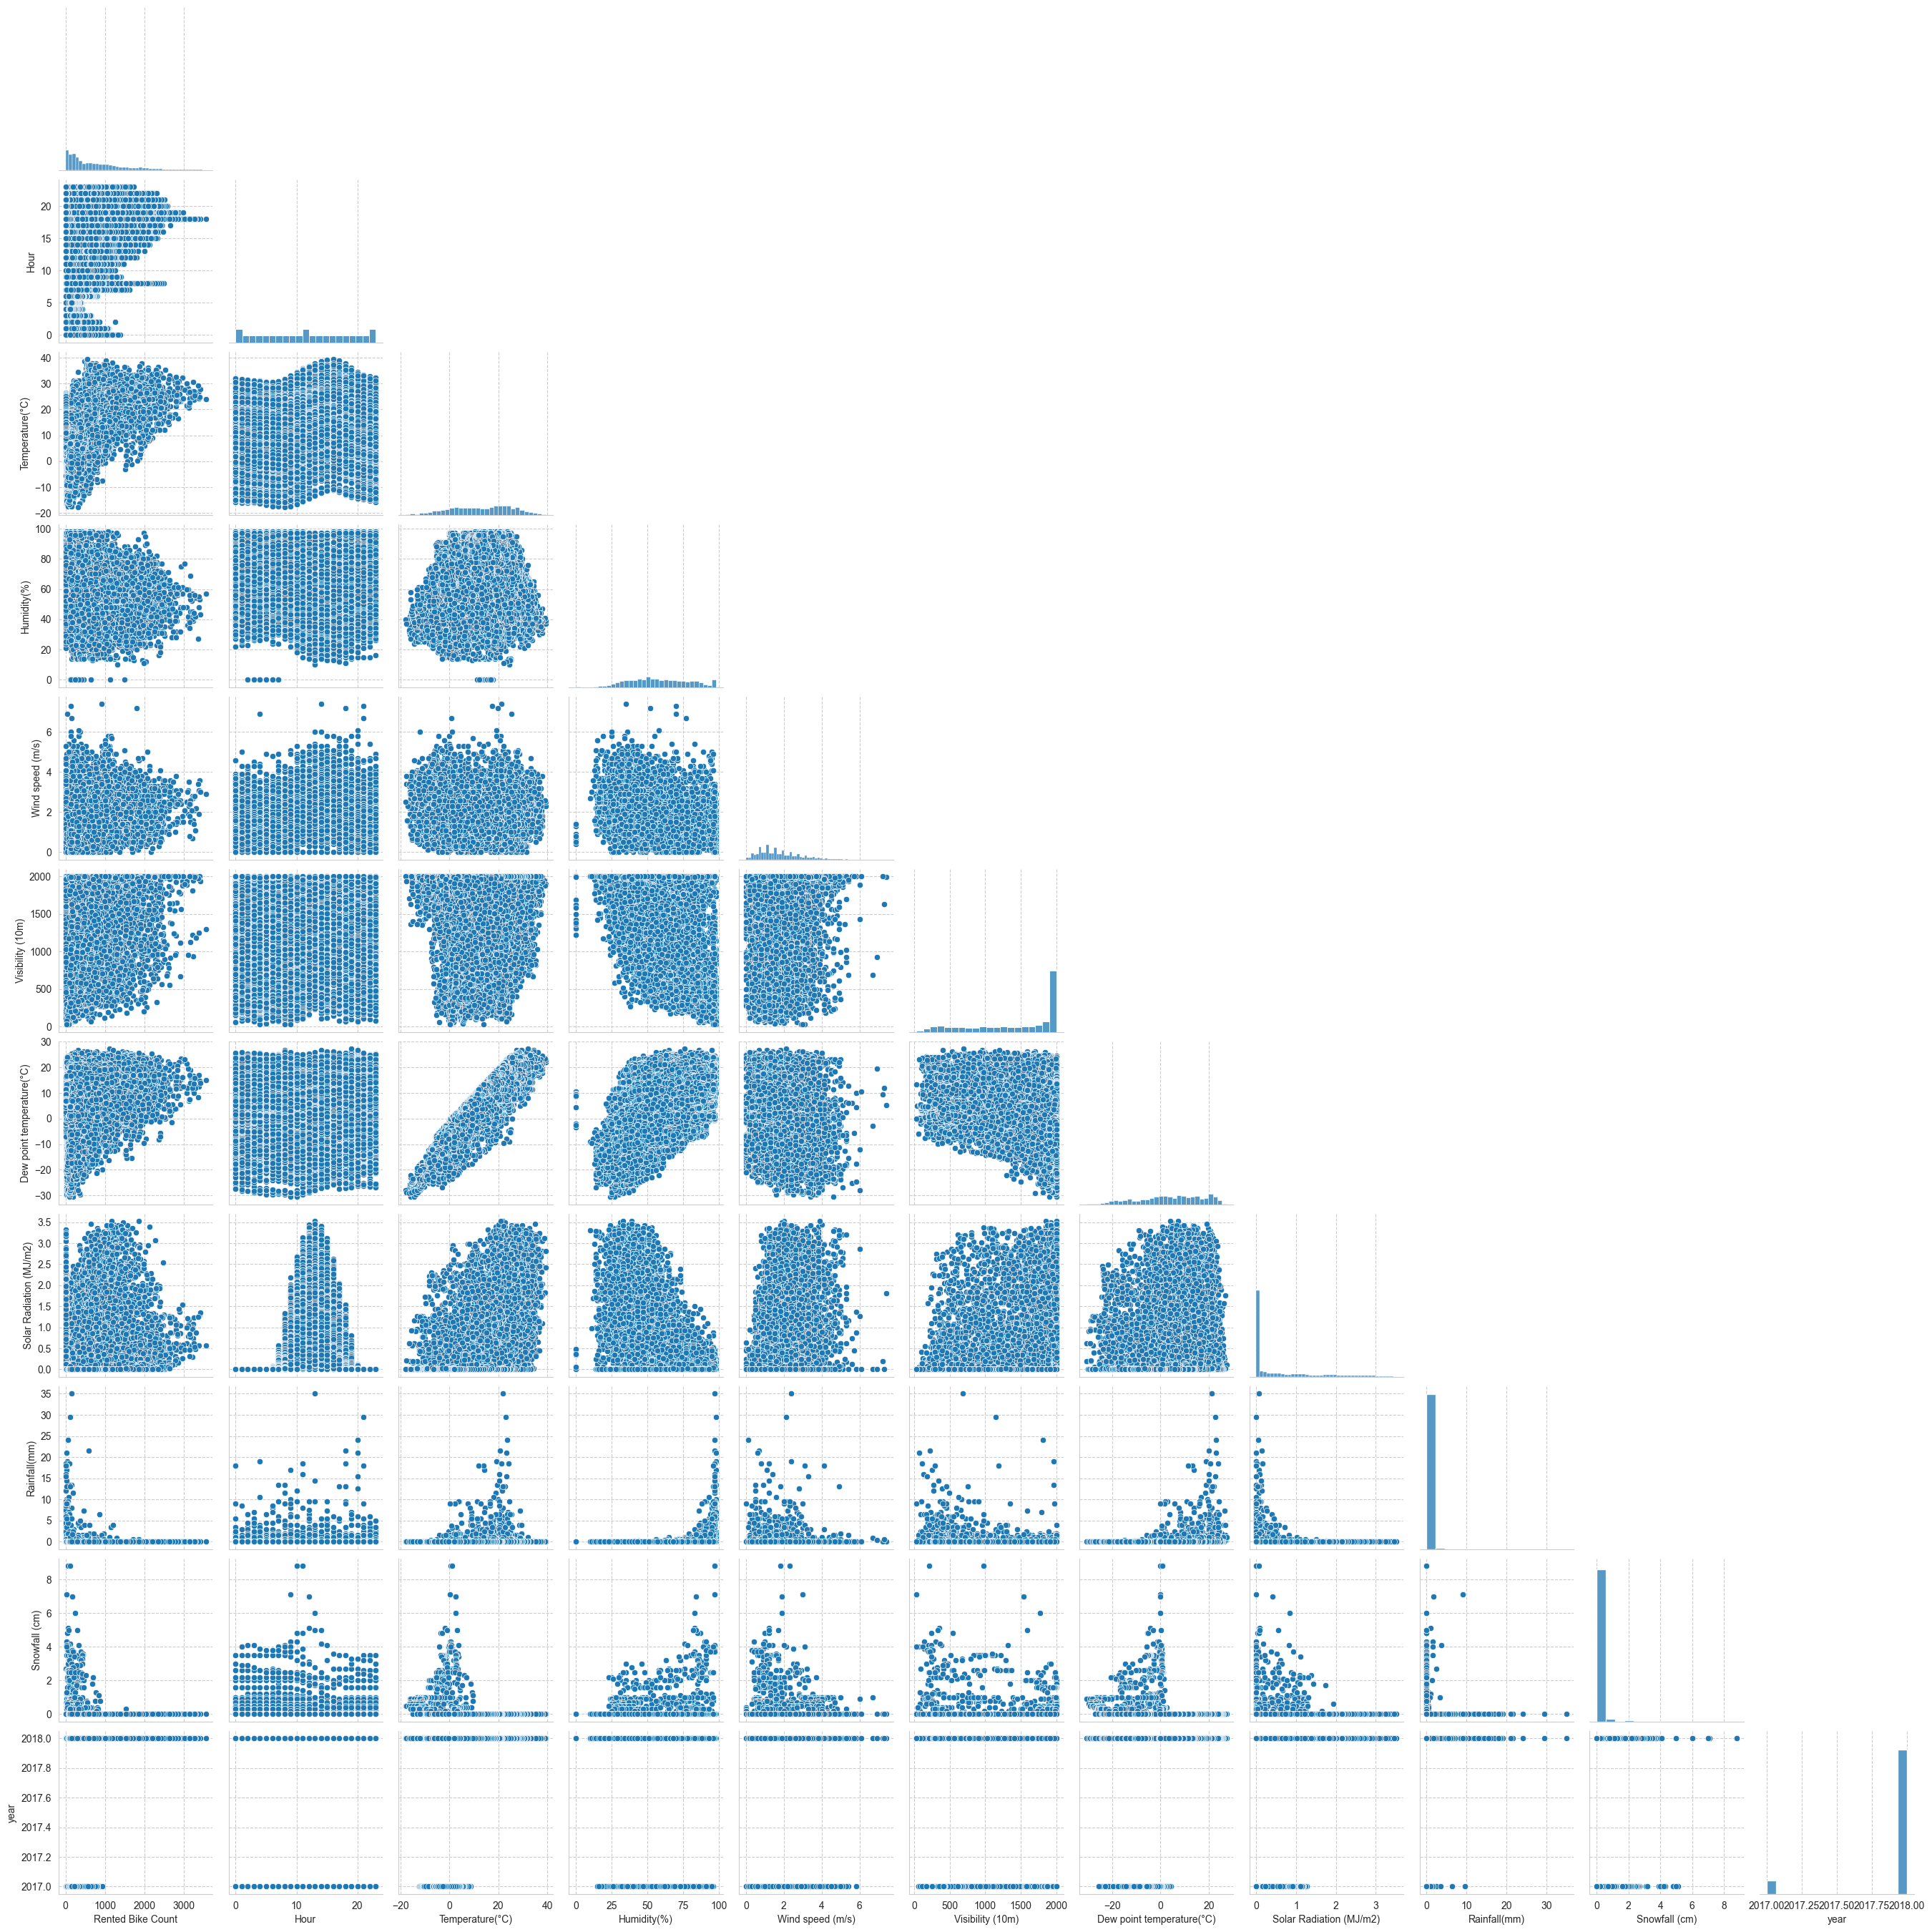

In [21]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

üéØ 1. ÌÉÄÍπÉ Î≥ÄÏàò (Rented Bike Count)ÏôÄÏùò Í¥ÄÍ≥Ñ
Temperature(¬∞C):

ÏñëÏùò Í¥ÄÍ≥ÑÍ∞Ä ÎöúÎ†∑ÌïòÍ≤å Í¥ÄÏ∞∞Îê® (Í∏∞Ïò®Ïù¥ ÎÜíÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä)

Îß§Ïö∞ Î™ÖÌôïÌïú ÎπÑÏÑ†Ìòï Ï∂îÏÑ∏ ‚Üí ÏÑ†ÌòïÌöåÍ∑Ä ÏÇ¨Ïö© Ïãú Îã§Ìï≠Ïãù ÎòêÎäî Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏ Í≥†Î†§

Dew point temperature(¬∞C):

Ïó≠Ïãú Í∏∞Ïò®Í≥º ÎπÑÏä∑Ìïú ÌòïÌÉúÏùò ÏñëÏùò Í¥ÄÍ≥Ñ

‚Üí TemperatureÏôÄ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎØÄÎ°ú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï£ºÏùò

Solar Radiation (MJ/m¬≤):

0Í∞íÏù¥ ÎßéÏïÑ Îæ∞Ï°±Ìïú Î∂ÑÌè¨ ÌòïÌÉúÏù¥ÏßÄÎßå, ÎåÄÏó¨Îüâ Ï¶ùÍ∞ÄÏôÄ Ïó∞Í¥Ä ÏûàÏùå

Ï¢ãÏùÄ ÎÇ†Ïî®ÏùºÏàòÎ°ù ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä

Hour:

ÎöúÎ†∑Ìïú Ïù¥Ï§ë Î¥âÏö∞Î¶¨(Bimodal) Î∂ÑÌè¨ ‚Üí Ï∂úÍ∑º¬∑Ìá¥Í∑º ÏãúÍ∞Ñ ÏàòÏöî Î∞òÏòÅ

Î™ÖÌôïÌïú ÎπÑÏÑ†ÌòïÏÑ±

Humidity(%), Rainfall(mm), Snowfall(cm):

ÏùåÏùò Í¥ÄÍ≥Ñ Î≥¥ÏûÑ

ÌäπÌûà Rainfall, SnowfallÏùÄ 0 Í∑ºÏ≤òÏùò Í∞íÏù¥ ÎåÄÎ∂ÄÎ∂ÑÏù¥ÏßÄÎßå Í∞ïÏàò/Ï†ÅÏÑ§ Ïãú ÏàòÏöî Í∏âÍ∞ê

‚Üí Í∞ïÌïú ÏñµÏ†ú Ìö®Í≥º Ï°¥Ïû¨

üîÅ 2. ÎèÖÎ¶Ω Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÏÑ± (Í≥µÏÑ†ÏÑ± Í∞ÄÎä•ÏÑ±)
Temperature ‚Üî Dew point temperature:

Îß§Ïö∞ Í∞ïÌïú ÏÑ†ÌòïÍ¥ÄÍ≥Ñ ‚Üí Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú ÏûàÏùå

Îëò Ï§ë ÌïòÎÇòÎßå ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏïàÏ†ïÏ†Å

Rainfall / Snowfall / Solar Radiation:

ÏÑúÎ°ú Îã§Î•∏ Î∂ÑÌè¨, ÌÅ¨Í≤å ÏÉÅÍ¥ÄÏùÄ ÏóÜÏúºÎÇò Î™®Îëê 0 Ï§ëÏã¨Ïùò Ìù¨ÏÜå Îç∞Ïù¥ÌÑ∞

‚Üí Î°úÍ∑∏ Î≥ÄÌôò ÎòêÎäî Ïù¥ÏßÑÌôîÎèÑ Í≥†Î†§ Í∞ÄÎä•

Humidity ‚Üî Dew Point:

Ïò®ÎèÑ Ï†ïÎ≥¥ÏôÄ Í≤∞Ìï©Îêú Î≥ÄÏàòÎì§Ïù¥ÎØÄÎ°ú Ï£ºÏùò

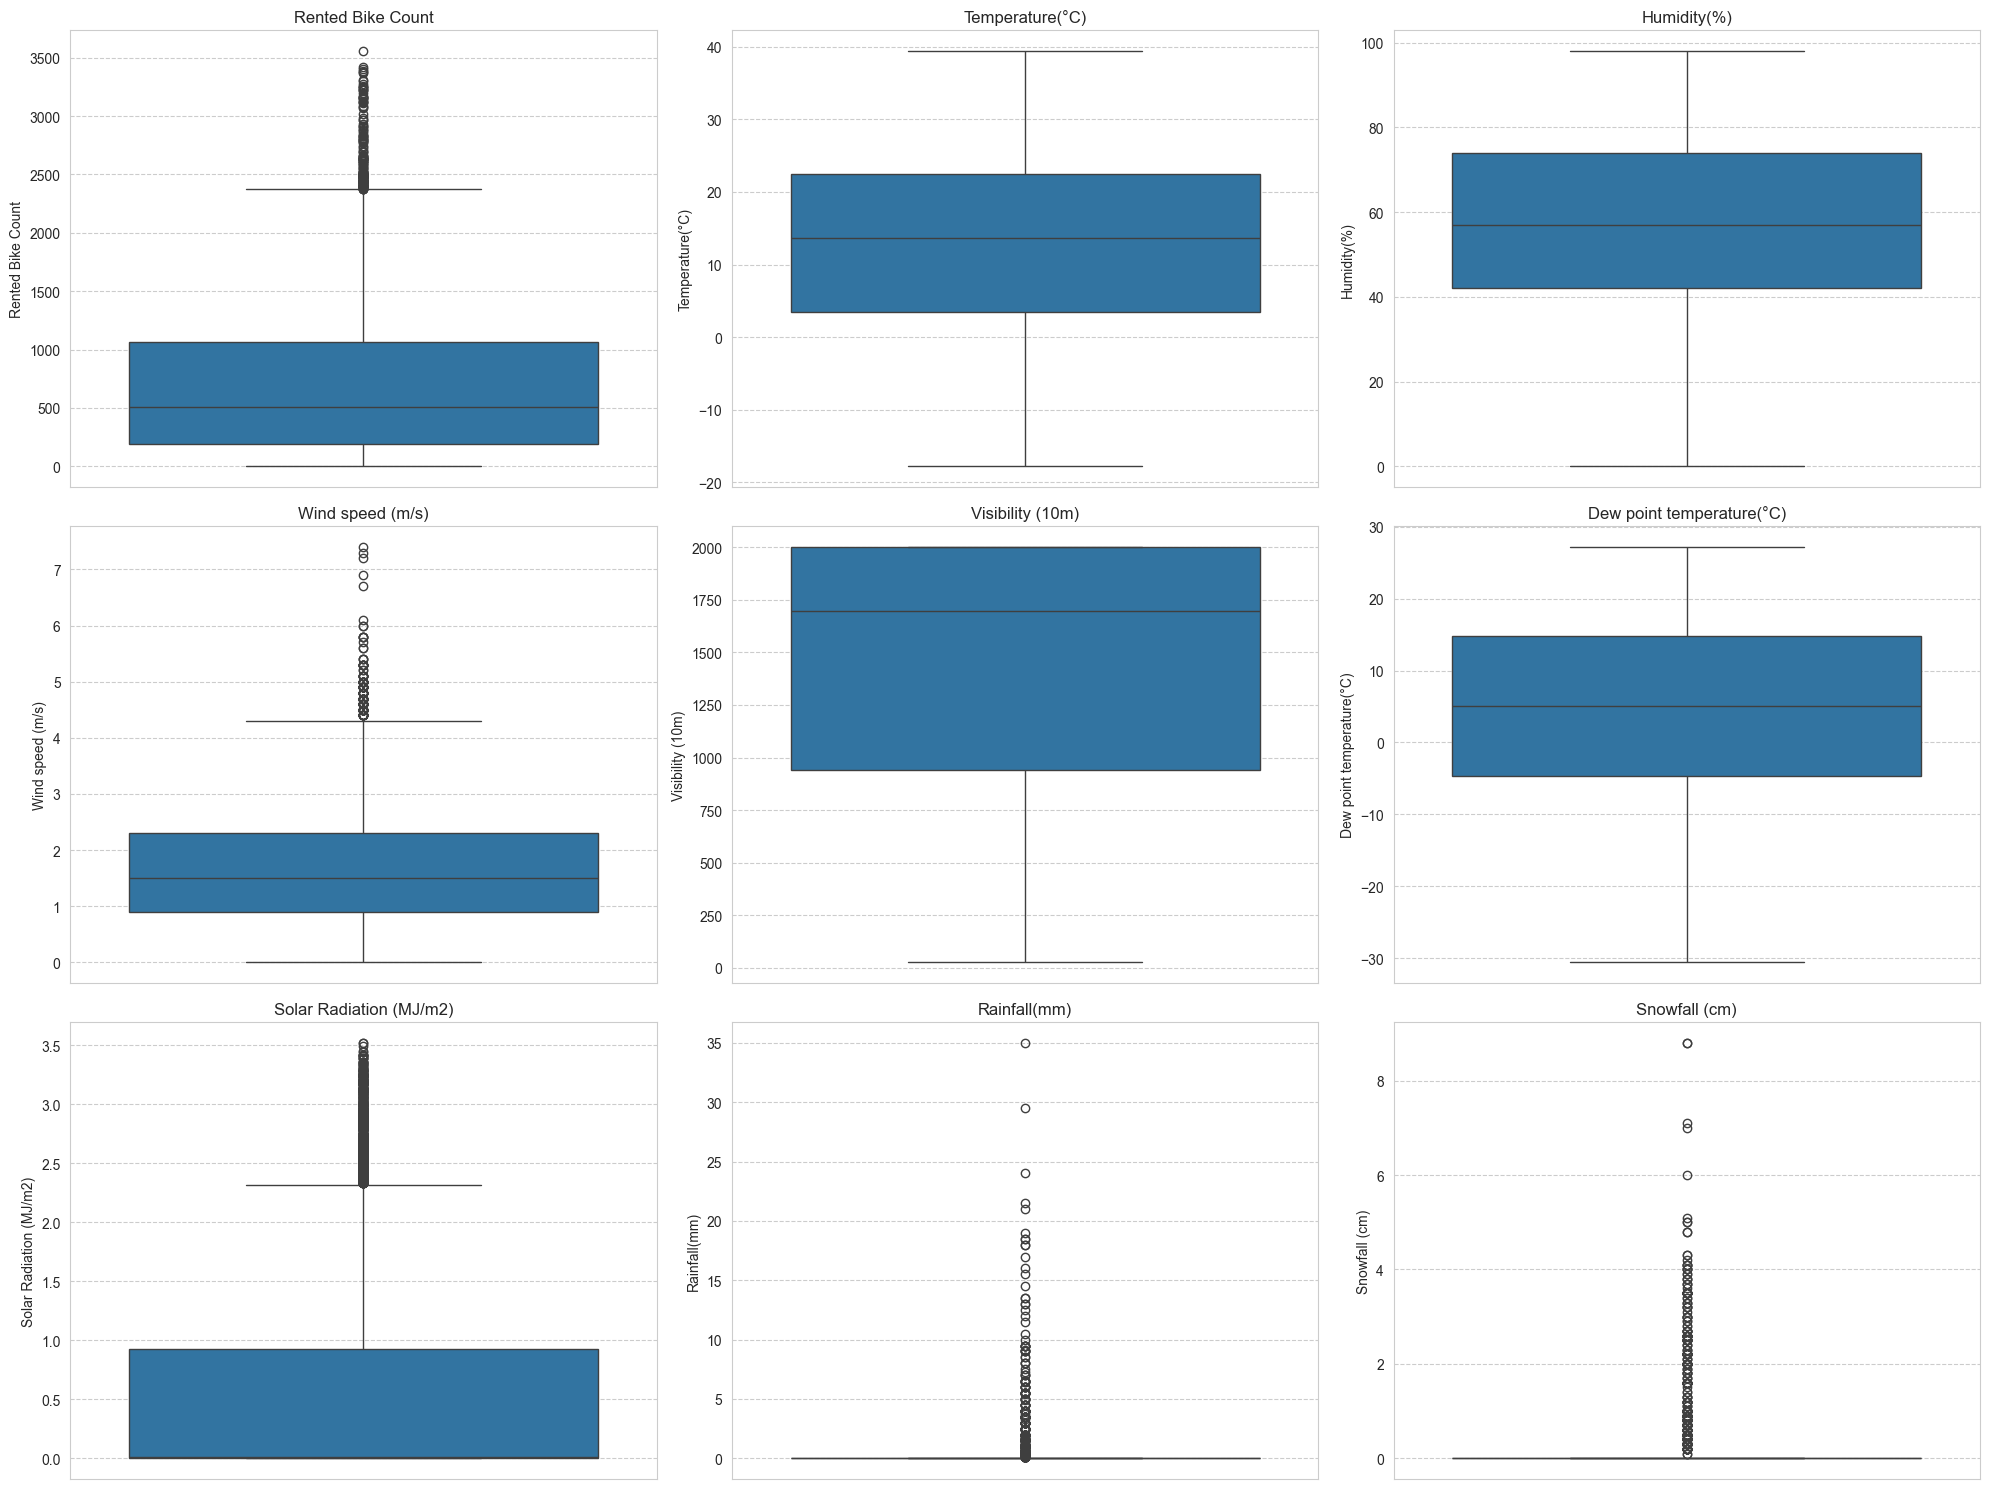

In [22]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

| Î≥ÄÏàòÎ™Ö                            | Î∂ÑÌè¨ Î∞è ÌäπÏßï                               | Ïù¥ÏÉÅÏπò Ïó¨Î∂Ä                          | Ìï¥ÏÑù                              |
| ------------------------------ | ------------------------------------- | ------------------------------- | ------------------------------- |
| **Rented Bike Count**          | Í∞ïÌïú Ïö∞Ï∏° Íº¨Î¶¨(long right tail), Ï§ëÏúÑÏàòÎäî ÏïΩ 500 | ‚úÖ Îã§Ïàò Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ (2000 Ïù¥ÏÉÅ)           | Ïù∏Í∏∞ ÏãúÍ∞ÑÎåÄÏóêÏÑú Ìè≠Ï¶ùÌïòÎäî ÏàòÏöî Ï°¥Ïû¨ Í∞ÄÎä•ÏÑ± (Ï∂úÌá¥Í∑º Îì±) |
| **Temperature (¬∞C)**           | Ï†ÅÏ†àÌïú Î≤îÏúÑ (ÏïΩ -15¬∞C \~ 35¬∞C), Í±∞Ïùò ÎåÄÏπ≠ Î∂ÑÌè¨    | ‚ùå Ïù¥ÏÉÅÏπò ÏóÜÏùå                        | Í≥ÑÏ†àÏÑ±ÏùÑ Ïûò Î∞òÏòÅÌïú Í∏∞Ïò®                   |
| **Humidity (%)**               | ÎåÄÏ≤¥Î°ú ÎåÄÏπ≠, Ï§ëÍ∞ÑÍ∞í ÏïΩ 60%                     | ‚ùå Ïù¥ÏÉÅÏπò ÏóÜÏùå                        | ÏòàÏ∏°Ïóê Ïú†Ïö©Ìïú ÏäµÎèÑ Ï†ïÎ≥¥                   |
| **Wind speed (m/s)**           | Ìé∏Ìñ• Î∂ÑÌè¨, ÏïΩ 4\~5m/s Ïù¥ÏÉÅ Í∞íÏù¥ Ïù¥ÏÉÅÏπòÎ°ú Ï≤òÎ¶¨Îê®       | ‚úÖ Îã§Ïàò Ï°¥Ïû¨                         | Í≥†ÌíçÏÜçÏùÄ Í∑πÌûà ÎìúÎ¨ºÎ©∞, Ïã§Ï†ú Ïù¥ÏÉÅÍ∞í Í∞ÄÎä•ÏÑ± ÏûàÏùå      |
| **Visibility (10m)**           | 2000 Í∑ºÏ≤òÏóê Î™∞Î†§ ÏûàÏùå, ÏùºÎ∂Ä ÎÇÆÏùÄ Í∞í Ï°¥Ïû¨            | ‚ùå Ïù¥ÏÉÅÏπò ÏóÜÏùå (ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î∞ÄÏßëÎêòÏñ¥ ÏûàÏßÄÎßå Ï†ïÏÉÅ Î≤îÏúÑ) | ÏãúÏ†ï Í±∞Î¶¨ Ï†ïÎ≥¥, ÎÇÆÏùÑÏàòÎ°ù ÎÇòÏÅ®               |
| **Dew point temperature (¬∞C)** | Ï§ëÍ∞ÑÍ∞íÏùÄ 5\~10ÎèÑ, Ï†ÅÏ†àÌïú Î≤îÏúÑ                   | ‚ùå ÏóÜÏùå                            | Ïò®ÎèÑÏôÄ Î∞ÄÏ†ëÌïú Í¥ÄÍ≥Ñ, Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï£ºÏùò            |
| **Solar Radiation (MJ/m¬≤)**    | ÎåÄÎ∂ÄÎ∂Ñ 0Ïóê Í∞ÄÍπåÏõÄ, Í∑πÏÜåÏàò ÎÜíÏùÄ Í∞í Ï°¥Ïû¨               | ‚úÖ Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ (3 Ïù¥ÏÉÅ Í∞í)               | ÌùêÎ¶∞ ÎÇ†Ïù¥ ÎßéÍ≥†, ÎßëÏùÄ ÎÇ†ÏóêÎßå Í∑πÎã®Ï†Å Í∞í Î∞úÏÉù       |
| **Rainfall (mm)**              | ÎåÄÎ∂ÄÎ∂Ñ 0, ÏÜåÏàòÏùò ÌÅ∞ Í∞í Ï°¥Ïû¨                     | ‚úÖ Ï°¥Ïû¨ (20\~30mm Îì±)               | Ìè≠Ïö∞ÎÇò Ïû•ÎßàÏùº Ïàò ÏûàÏùå                    |
| **Snowfall (cm)**              | ÎåÄÎ∂ÄÎ∂Ñ 0, ÏÜåÏàòÏùò ÌÅ∞ Í∞í Ï°¥Ïû¨                     | ‚úÖ Ï°¥Ïû¨ (5\~8cm Ïù¥ÏÉÅ)                | Í≤®Ïö∏Ï≤† ÌäπÏù¥ Ïù¥Î≤§Ìä∏ Í∞ÄÎä•ÏÑ± ÏûàÏùå               |


### Categorical feature Î∂ÑÏÑù

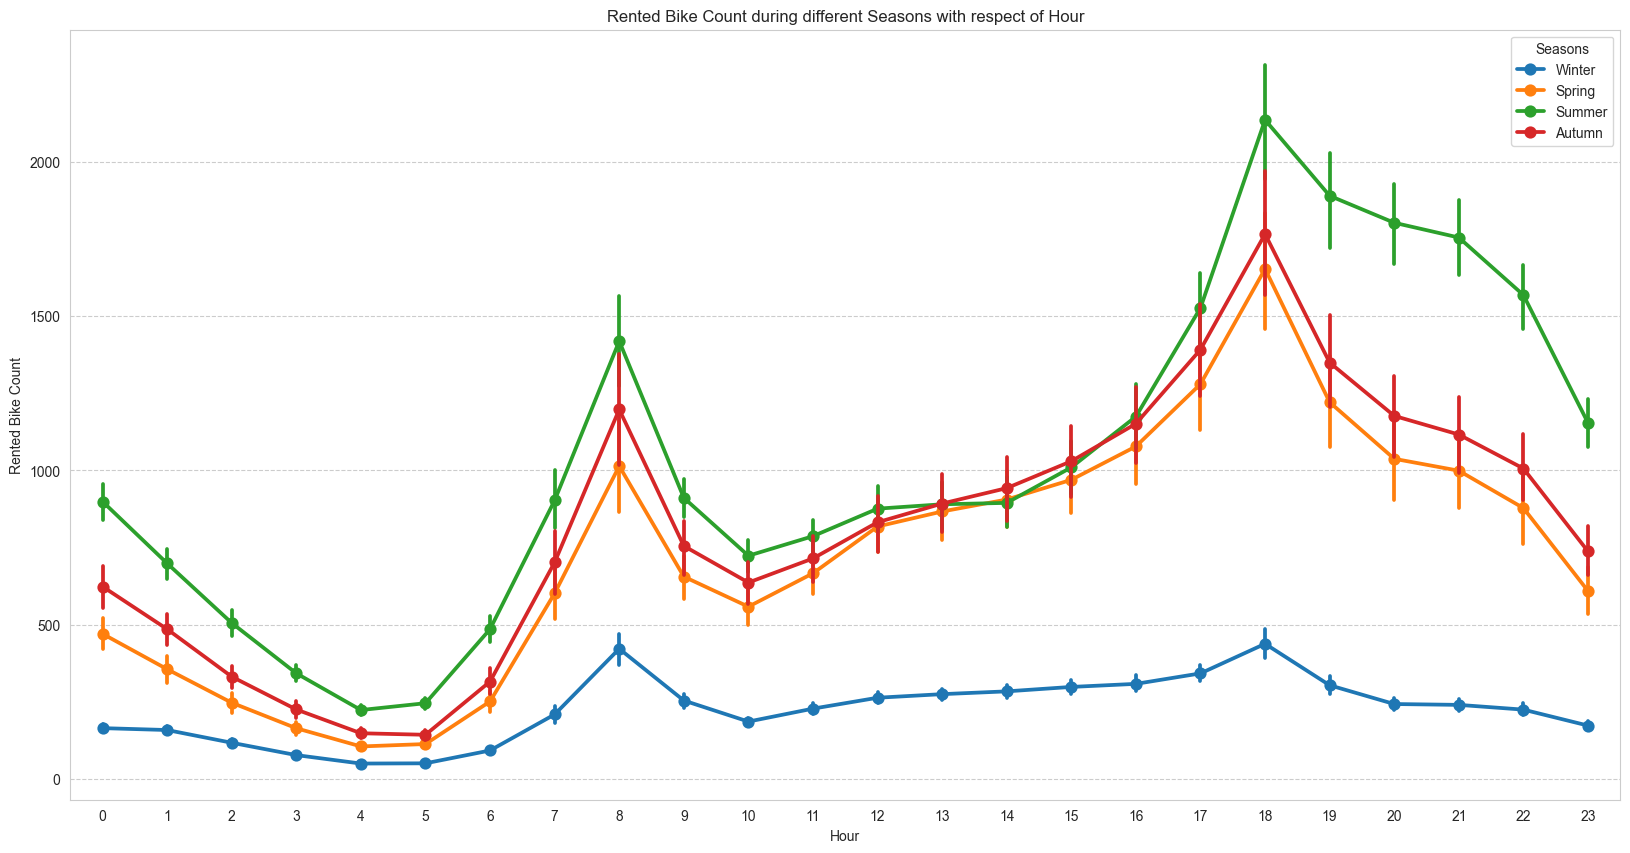

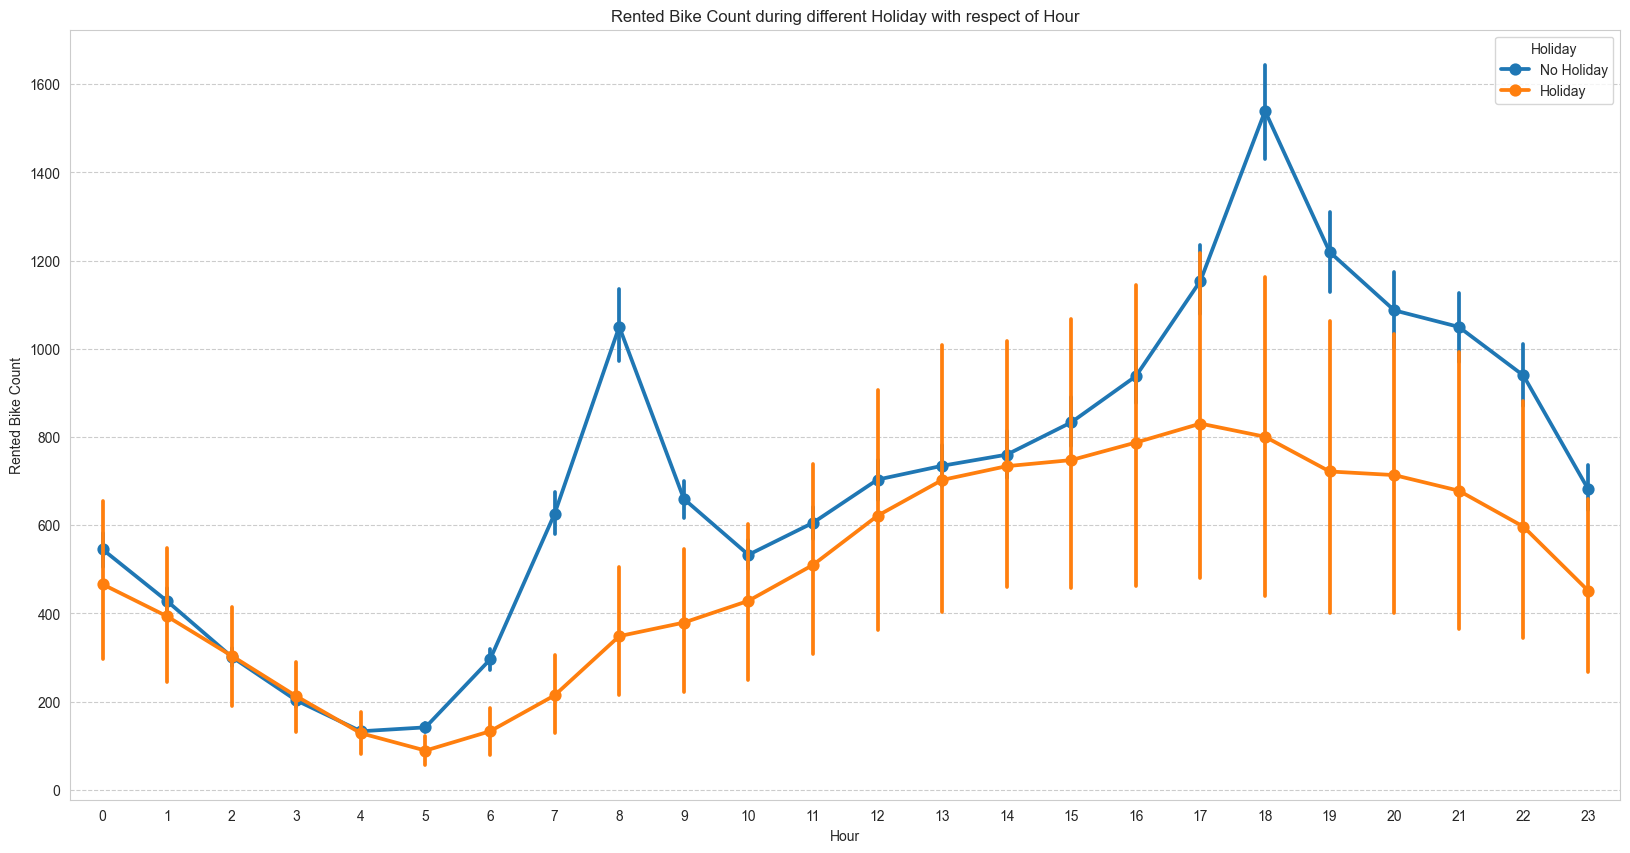

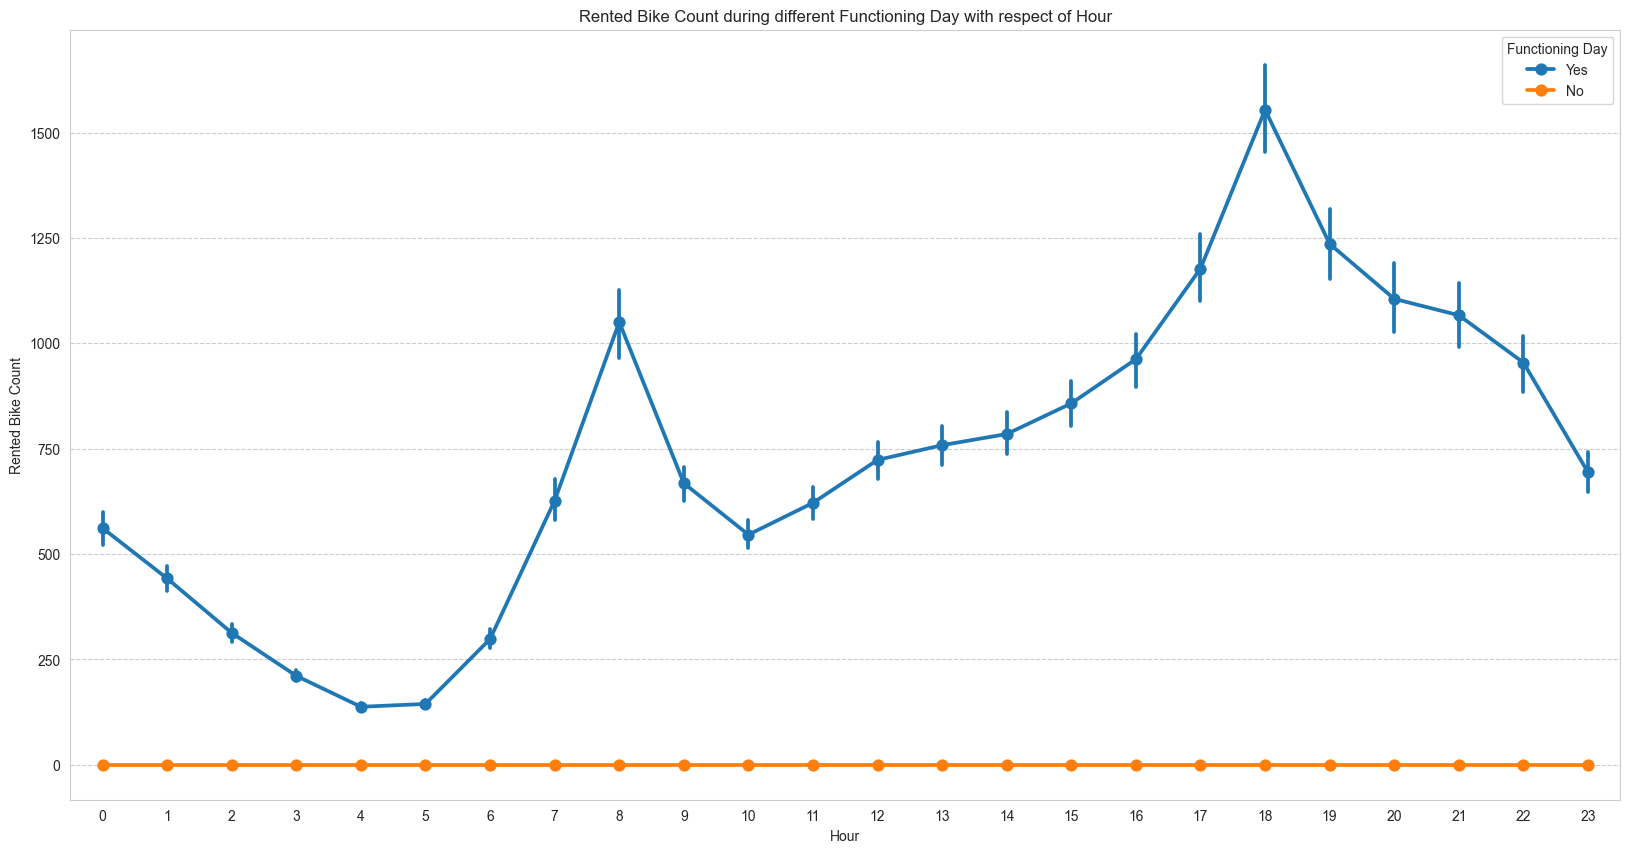

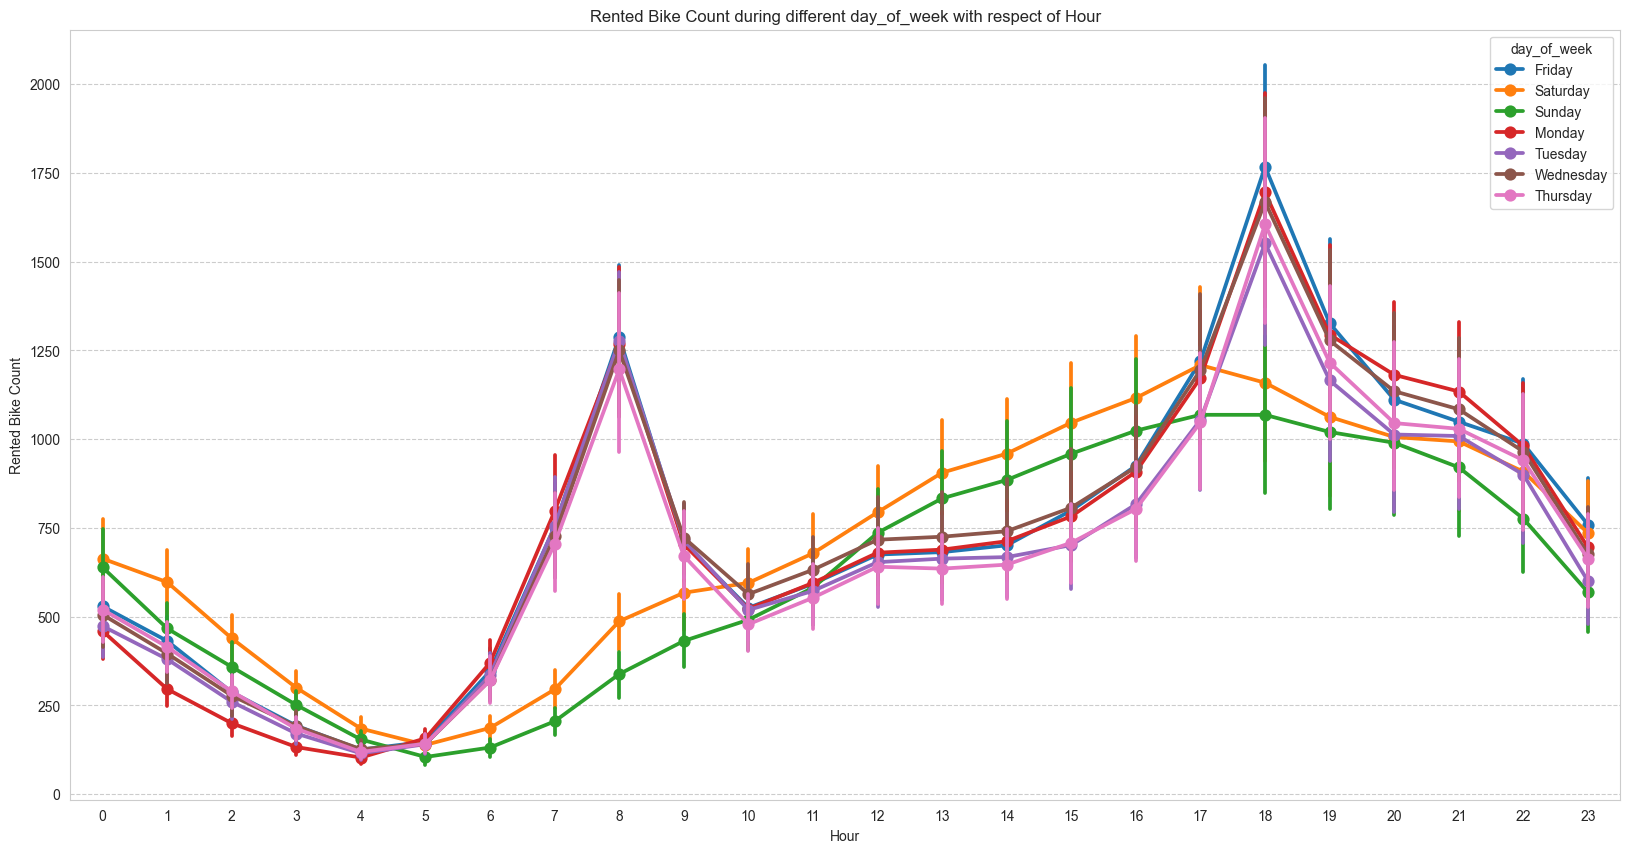

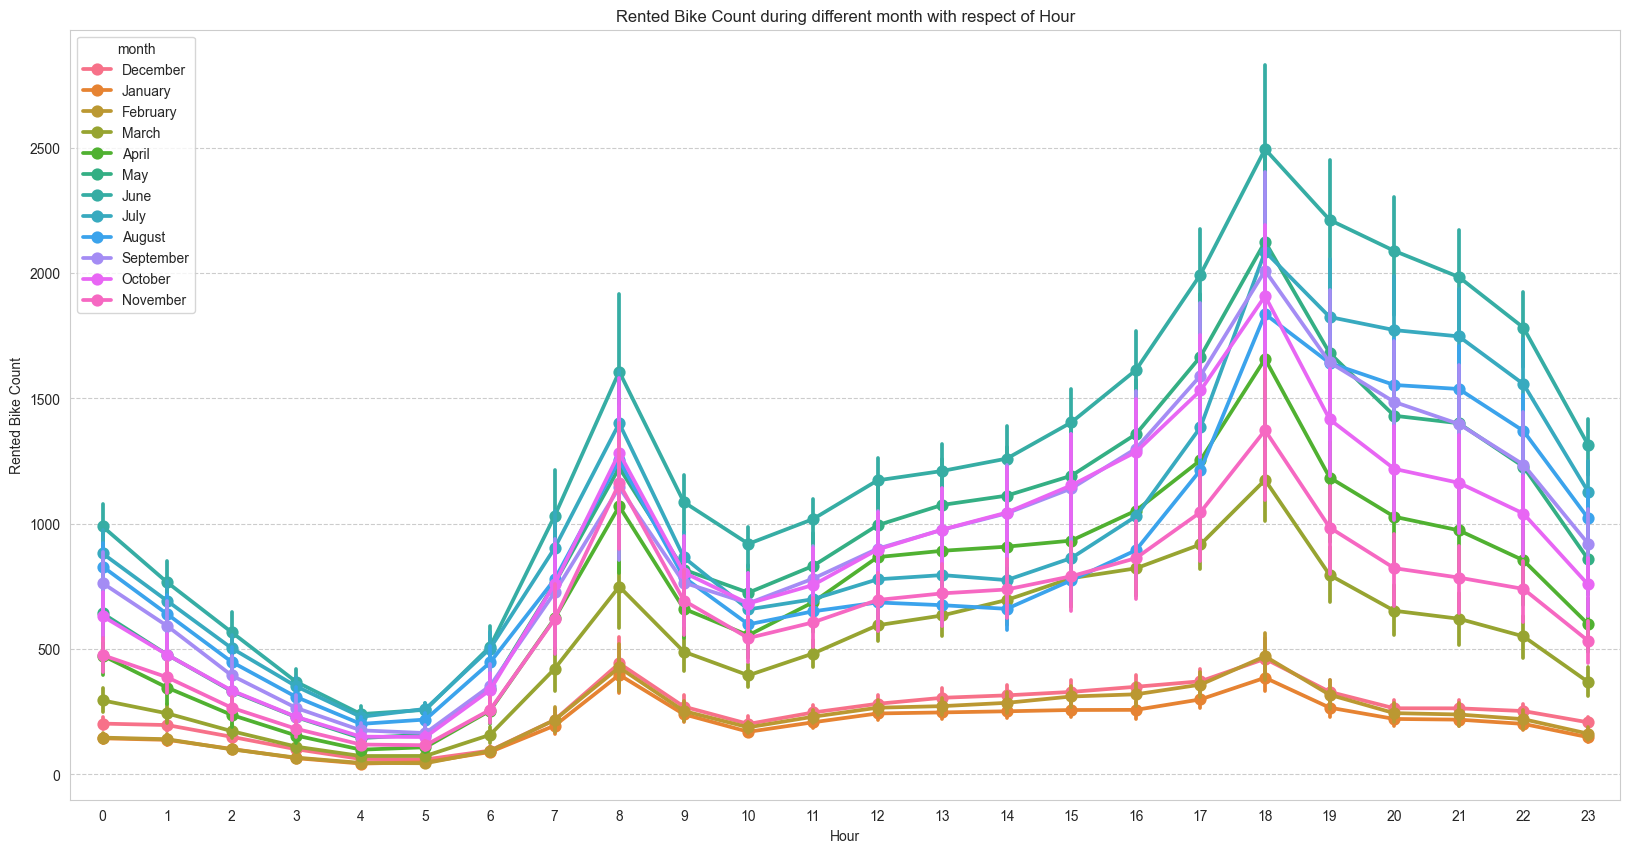

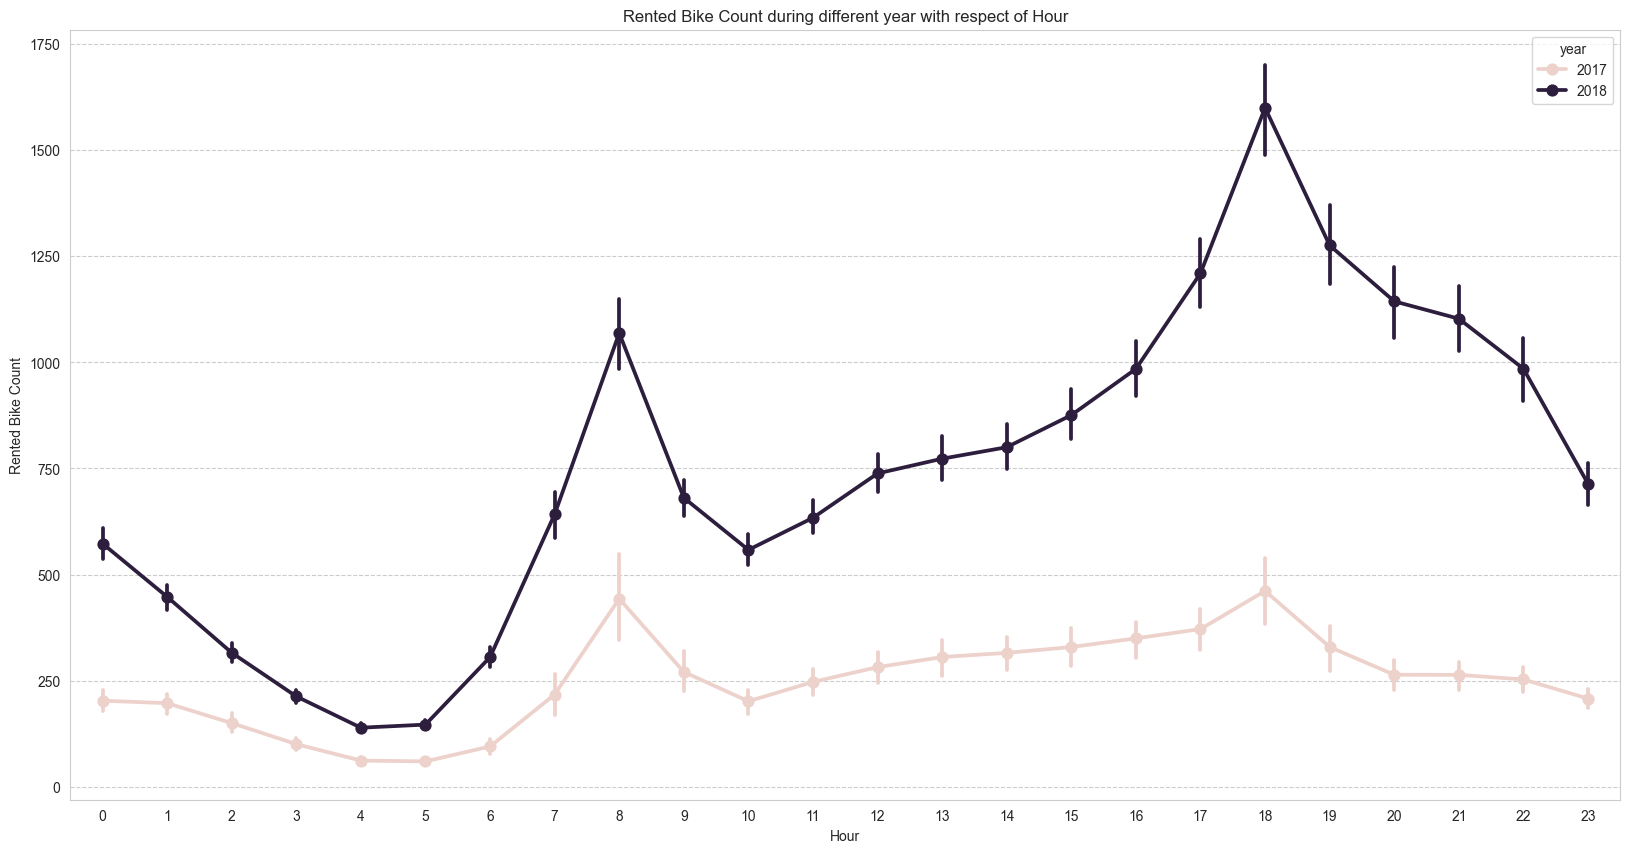

In [23]:
#point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

EDA for cat results

## Season 
In the season column, demand is low at winter, others are seems similar. 

## Holiday
During holiday the demand is lower than non-holiday, 
It's seems like many people use bike for going work

## Functioning Day
If it is  no Functioning Day then there is no demand -> ÎãπÏó∞
So, we need to delete no functioning date for the column(it can't be the feature)

## Days of week
ÌèâÏùº(Mon‚ÄìFri): Ï∂úÌá¥Í∑º ÌîºÌÅ¨ (08Ïãú, 18Ïãú)Í∞Ä ÏÑ†Î™ÖÌï®
Ï£ºÎßê(Sat, Sun): ÌîºÌÅ¨Í∞Ä ÎÇÆÍ≥† Ïò§ÌõÑ ÏãúÍ∞ÑÎåÄ(13~17Ïãú)Ïóê Í≥†Î•¥Í≤å Î∂ÑÌè¨
Í∏àÏöîÏùº(Fri)ÏùÄ Ìá¥Í∑º ÌõÑ ÎåÄÏó¨ÎüâÏù¥ Îã§Î•∏ ÌèâÏùºÎ≥¥Îã§ Îçî ÎÜíÏùå
‚Üí ÏöîÏùºÏùÄ ÎåÄÏó¨ Î™©Ï†ÅÏùÑ Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäî Ï§ëÏöîÌïú Î≥ÄÏàò (Ï∂úÍ∑º/Î†àÏ†Ä) + Ï£ºÎßêÎ°ú Îî∞Î°ú Î∂ÑÎ•òÌïòÎäîÍ≤ÉÎèÑ Í∞ÄÎä•Ìï†ÎìØ

## month 
In the month column, We can clearly see that the demand is low in December January & Febuary. 
Beacause it is winter season. Month and season seems like they have similar info

## year
the demand of 2018 get bigger

In [24]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [25]:
# value counts of Week column
df.week.value_counts()

week
Weekdays    6264
Weekend     2496
Name: count, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

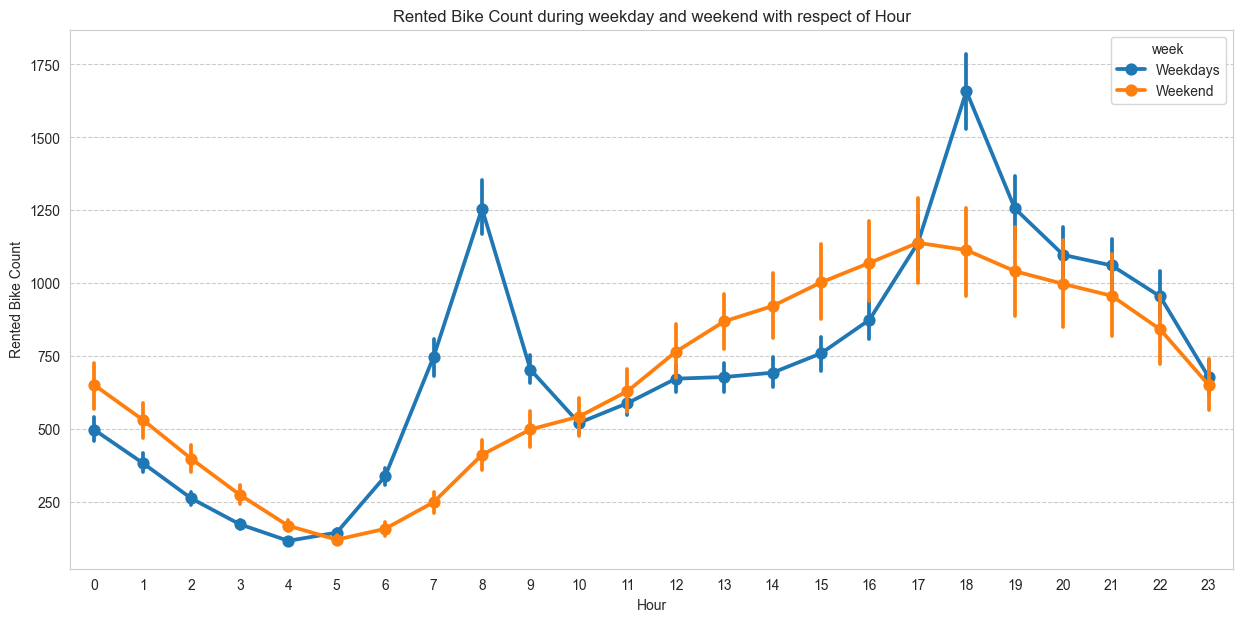

In [26]:
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

In [27]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)